# Correlate T cell counts

Script related to figure s3b

### Aim:
- Evaluate T cell count correlations between T cell subsets of the treatment naive HGSOC samples

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import scipy.stats

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load T cell counts

In [4]:
file_Tcells = home + "/Data/2/T_cell_counts.txt"

Tcell_counts = pd.read_csv(file_Tcells,
                           sep='\t',
                           index_col=None)

In [5]:
Tcell_counts.head()

,Well,Case,Label,Site,Habitat,IF_index_file,CD8,FoxP3,CD4FoxP3,CD4,Cell_counts
0,A01,10,omentum green,omentum,green,23.0,5216.0,430.0,81.0,2340.0,41027.0
1,A01,10,omentum green,omentum,green,24.0,4956.0,404.0,47.0,761.0,33929.0
2,A01,10,omentum green,omentum,green,25.0,2485.0,197.0,58.0,1824.0,20667.0
3,A01,10,omentum green,omentum,green,26.0,1826.0,195.0,52.0,680.0,11491.0
4,A01,10,omentum green,omentum,green,27.0,1961.0,183.0,49.0,892.0,19348.0


### Check count distributions

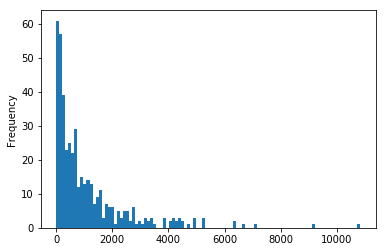

In [6]:
Tcell_counts['CD8'].plot(kind='hist', bins=100)

In [7]:
scipy.stats.shapiro(Tcell_counts['CD8'].dropna())

(0.7164571285247803, 1.2254666813860716e-26)

In [8]:
Tcell_counts['CD8'].dropna().shape

(440,)

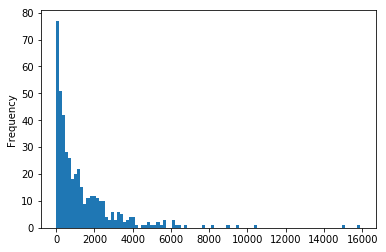

In [9]:
(Tcell_counts['CD4']-Tcell_counts['CD4FoxP3']).plot(kind='hist', bins=100)

In [10]:
scipy.stats.shapiro((Tcell_counts['CD4']-Tcell_counts['CD4FoxP3']).dropna())

(0.6753886938095093, 3.6478598520163856e-28)

In [11]:
(Tcell_counts['CD4']-Tcell_counts['CD4FoxP3']).dropna().shape

(440,)

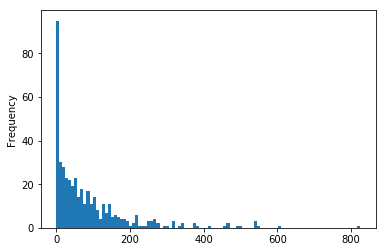

In [12]:
Tcell_counts['CD4FoxP3'].plot(kind='hist', bins=100)

In [13]:
scipy.stats.shapiro(Tcell_counts['CD4FoxP3'].dropna())

(0.7255253195762634, 2.807752868759095e-26)

In [14]:
Tcell_counts['CD4FoxP3'].dropna().shape

(440,)

##### Distributions are skewed to the left, let's use Kendall's rank correlation
##### Kendall’s Tau: usually smaller values than Spearman’s rho correlation. Calculations based on concordant and discordant pairs. Insensitive to error. P values are more accurate with smaller sample sizes.

## Do correlations

### Check and remove missing data

In [15]:
True in set(Tcell_counts['CD8'].isnull())

True

In [16]:
True in set(Tcell_counts['CD4'].isnull())

True

In [17]:
True in set(Tcell_counts['CD4FoxP3'].isnull())

True

In [18]:
Tcell_counts.dropna(inplace=True)

In [19]:
True in set(Tcell_counts['CD8'].isnull())

False

In [20]:
True in set(Tcell_counts['CD4'].isnull())

False

In [21]:
True in set(Tcell_counts['CD4FoxP3'].isnull())

False

### Do correlations

In [22]:
cd8      = Tcell_counts['CD8']
cd4      = Tcell_counts['CD4'] - Tcell_counts['CD4FoxP3']
cd4foxp3 = Tcell_counts['CD4FoxP3']

#### CD8 vs CD4

[Text(0,0.5,'CD4'), Text(0.5,0,'CD8')]

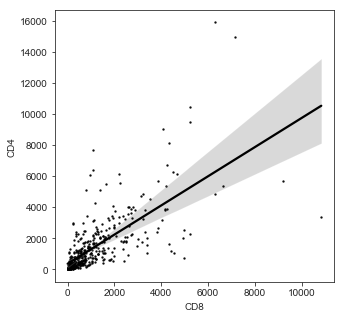

In [23]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

rg = sns.regplot(x=cd8,
                 y=cd4,
                 truncate=True,
                 color='k',
                 scatter_kws={'s':2})

rg.set(xlabel='CD8',
       ylabel='CD4')

In [24]:
kendalltau(cd8,cd4,method="asymptotic")

KendalltauResult(correlation=0.6214712725041086, pvalue=2.112997205724269e-84)

### Save plot

In [26]:
ls ../../Figures/supplementary/3/

OVCT_Fig_s3.pdf.zip  README.md
OVCT_Fig_s3.png      panels/


In [27]:
fig = ax.get_figure()

FILE = "../../Figures/supplementary/3/panels/s3b_CD8_and_CD4_correlation.pdf"

fig.savefig(FILE, bbox='tight')

#### CD8 vs CD4FoxP3

[Text(0,0.5,'CD4FoxP3'), Text(0.5,0,'CD8')]

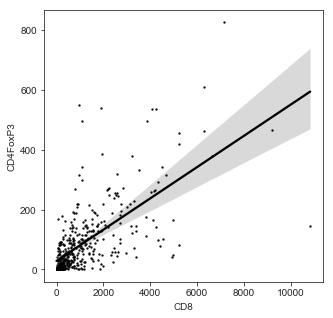

In [28]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

rg = sns.regplot(x=cd8,
                 y=cd4foxp3,
                 truncate=True,
                 color='k',
                 scatter_kws={'s':2})

rg.set(xlabel='CD8',
       ylabel='CD4FoxP3')

In [29]:
kendalltau(cd8,cd4foxp3,method="asymptotic")

KendalltauResult(correlation=0.5232844675570381, pvalue=8.875583572727189e-60)

### Save plot

In [30]:
fig = ax.get_figure()

FILE = "../../Figures/supplementary/3/panels/s3b_CD8_and_CD4FoxP3_correlation.pdf"

fig.savefig(FILE, bbox='tight')

#### CD4 vs CD4FoxP3

[Text(0,0.5,'CD4FoxP3'), Text(0.5,0,'CD4')]

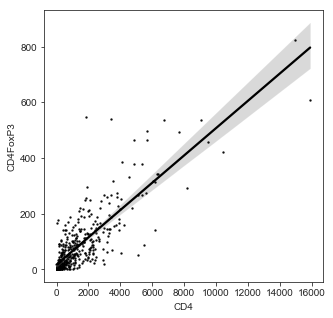

In [31]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

rg = sns.regplot(x=cd4,
                 y=cd4foxp3,
                 truncate=True,
                 color='k',
                 scatter_kws={'s':2})

rg.set(xlabel='CD4',
       ylabel='CD4FoxP3')

In [32]:
kendalltau(cd4,cd4foxp3,method="asymptotic")

KendalltauResult(correlation=0.6062046564701892, pvalue=1.3085895406734023e-79)

### Save plot

In [34]:
fig = ax.get_figure()

FILE = "../../Figures/supplementary/3/panels/s3b_CD4_and_CD4FoxP3_correlation.pdf"

fig.savefig(FILE, bbox='tight')

# End script